In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import os
sys.path.append("..")

In [2]:
project_id = "anan-project"
nqubit = 7

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/toshifumi.anan/uzabase/work/anan-project-bq-import-sa.json"

In [3]:
from common.utils.job_result import get_result_from_bq, summary_job_result_by_time
jobs = get_result_from_bq(project_id, f"nqubit = {nqubit}")

In [4]:
summaries = summary_job_result_by_time(jobs)
print(summaries)

[{'nqubit': 7, 'gate_type': 'indirect_xy', 'depth': 12, 't_type': 'random', 'min_time': '0', 'max_time': '2', 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 'cost': {'min': -8.316153822783487, 'max': -7.74393278477864, 'mean': -8.03468449113174, 'std': 0.1592258421778281}, 'iter': {'min': 11155.0, 'max': 34275.0, 'mean': 21937.9, 'std': 6668.303014260826}}, {'nqubit': 7, 'gate_type': 'indirect_xy', 'depth': 12, 't_type': 'random', 'min_time': '-10', 'max_time': '10', 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 'cost': {'min': -7.913628647454571, 'max': -6.559977414853504, 'mean': -7.53074555847675, 'std': 0.39455437620595263}, 'iter': {'min': 9300.0, 'max': 19644.0, 'mean': 13494.9, 'std': 2985.1320724550865}}, {'nqubit': 7, 'gate_type': 'indirect_xy', 'depth': 12, 't_type': 'random', 'min_time': '-1', 'max_time': '1', 'noise_singlequbit_value': 'None', 'nois

In [5]:
## x axis: layer, y axis: expectation value
plot_list = {}
for summary in summaries:
    if summary['t_type'] == 'random':
        if ("%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])) not in plot_list.keys():
            plot_list["%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['depth']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['cost']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['cost']['mean']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['iter']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['iter']['max']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])] = [summary['iter']['mean']]
        else:
            plot_list["%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['depth'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['cost']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['cost']['mean'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['iter']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['iter']['max'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'])].append(summary['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

In [6]:
print(plot_list.keys())

dict_keys(['indirect_xy-0-2-None-None-false-false-depth', 'indirect_xy-0-2-None-None-false-false-cost-min', 'indirect_xy-0-2-None-None-false-false-cost-mean', 'indirect_xy-0-2-None-None-false-false-iter-min', 'indirect_xy-0-2-None-None-false-false-iter-max', 'indirect_xy-0-2-None-None-false-false-iter-mean', 'indirect_xy--10-10-None-None-false-false-depth', 'indirect_xy--10-10-None-None-false-false-cost-min', 'indirect_xy--10-10-None-None-false-false-cost-mean', 'indirect_xy--10-10-None-None-false-false-iter-min', 'indirect_xy--10-10-None-None-false-false-iter-max', 'indirect_xy--10-10-None-None-false-false-iter-mean', 'indirect_xy--1-1-None-None-false-false-depth', 'indirect_xy--1-1-None-None-false-false-cost-min', 'indirect_xy--1-1-None-None-false-false-cost-mean', 'indirect_xy--1-1-None-None-false-false-iter-min', 'indirect_xy--1-1-None-None-false-false-iter-max', 'indirect_xy--1-1-None-None-false-false-iter-mean'])


In [7]:
print(plot_list['indirect_xy-0-2-None-None-false-false-depth'])
print(plot_list['indirect_xy-0-2-None-None-false-false-cost-min'])

[12, 16, 20, 24]
[-8.316153822783487, -8.388412484895882, -8.409933749449596, -8.416025248015375]


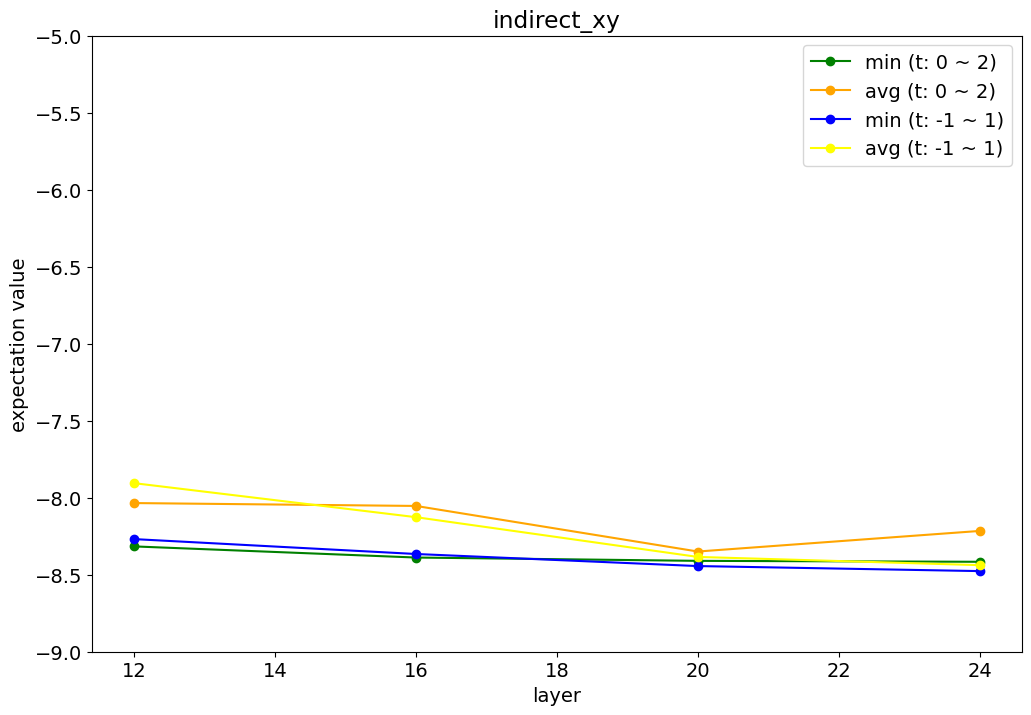

In [11]:
create_expectation_graph("indirect_xy")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
# plt.plot(plot_list['indirect_xy-t-0to2-depth'], plot_list['indirect_xy-t-0to2-cost-min'], marker='o', color='blue', label='min (t: 0 ~ 2)')
# plt.plot(plot_list['indirect_xy-t-0to2-depth'], plot_list['indirect_xy-t-0to2-cost-mean'], marker='o', color='red', label='avg (t: 0 ~ 2)')
plt.plot(plot_list['indirect_xy-0-2-None-None-false-false-depth'], plot_list['indirect_xy-0-2-None-None-false-false-cost-min'], marker='o', color='green', label='min (t: 0 ~ 2)')
plt.plot(plot_list['indirect_xy-0-2-None-None-false-false-depth'], plot_list['indirect_xy-0-2-None-None-false-false-cost-mean'], marker='o', color='orange', label='avg (t: 0 ~ 2)')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-depth'], plot_list['indirect_xy--1-1-None-None-false-false-cost-min'], marker='o', color='blue', label='min (t: -1 ~ 1)')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-depth'], plot_list['indirect_xy--1-1-None-None-false-false-cost-mean'], marker='o', color='yellow', label='avg (t: -1 ~ 1)')
plt.legend()
# plt.savefig('image/direct_energy.png')